Static dielectric constant (ε₀): 6.70


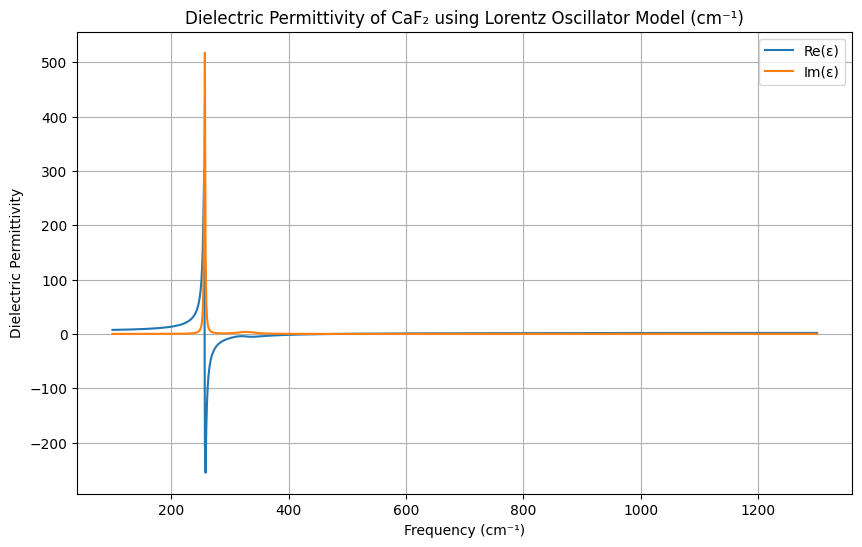

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from models.permittivity import compute_permittivity

# Parameters for CaF2 in cm^-1
epsilon_inf = 2.05        # High-frequency dielectric constant
nu_TO = 260               # Transverse optical phonon frequency (cm^-1)
nu_LO = 470               # Longitudinal optical phonon frequency (cm^-1)
gamma = 2.5               # Damping constant (cm^-1)

# Calculate static dielectric constant and delta_epsilon
epsilon_static = epsilon_inf * (nu_LO / nu_TO)**2  # Should be around 6.8
Delta_epsilon = epsilon_static - epsilon_inf

print(f"Static dielectric constant (ε₀): {epsilon_static:.2f}")

# Define the Lorentz oscillator model (using frequency in cm^-1)
def epsilon(nu):
    return epsilon_inf + (Delta_epsilon * nu_TO**2) / (nu_TO**2 - nu**2 - 1j * gamma * nu)

# Define frequency range in cm^-1 (e.g., from 0 to 600 cm^-1)
omega_m = np.linspace(100, 1300, 1000)

# Compute the dielectric function over the frequency range
eps = compute_permittivity(omega_m,'CaF2')#epsilon(nu)

# Plot the real and imaginary parts of ε(ν)
plt.figure(figsize=(10, 6))
plt.plot(omega_m, eps.real, label="Re(ε)")
plt.plot(omega_m, eps.imag, label="Im(ε)")
plt.xlabel("Frequency (cm⁻¹)")
plt.ylabel("Dielectric Permittivity")
plt.title("Dielectric Permittivity of CaF₂ using Lorentz Oscillator Model (cm⁻¹)")
plt.legend()
plt.grid(True)
plt.show()


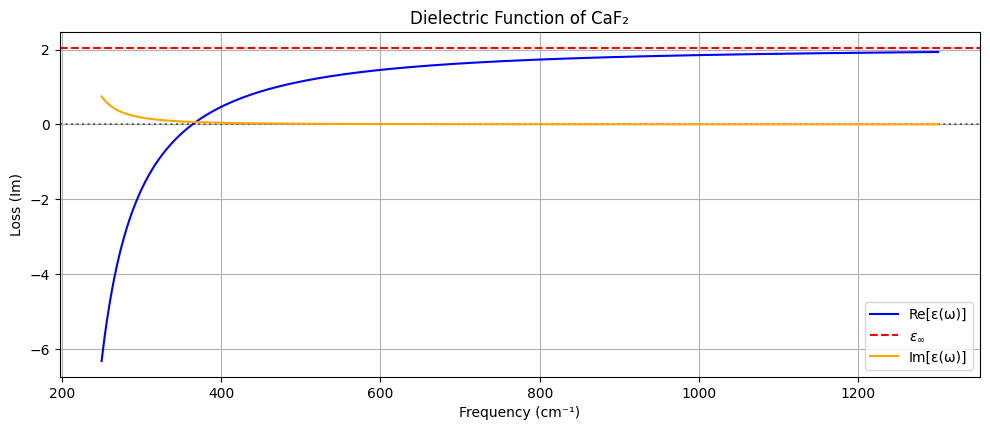

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants (converted to wavenumbers, cm⁻¹)
epsilon_inf = 2.05                # High-frequency dielectric constant
epsilon_0 = 6.8                   # Static dielectric constant
omega_TO = 200                    # TO phonon frequency (cm⁻¹)
gamma_ph = 8                      # Phonon damping (cm⁻¹)

# Frequency range (cm⁻¹)
omega_cm = np.linspace(250, 1300, 1000)

# Convert frequencies to angular frequencies (squared terms only need proportional values)
omega = omega_cm
omega_TO_sq = omega_TO**2

# Dielectric function calculation
numerator = (epsilon_0 - epsilon_inf) * omega_TO_sq
denominator = omega_TO_sq - omega**2 - 1j * gamma_ph * omega
epsilon = epsilon_inf + numerator / denominator

# Split into real and imaginary parts
epsilon_real = np.real(epsilon)
epsilon_imag = np.imag(epsilon)

# Plotting
plt.figure(figsize=(10, 8))

# Real part
plt.subplot(2, 1, 1)
plt.plot(omega_cm, epsilon_real, label='Re[ε(ω)]', color='b')
plt.axhline(epsilon_inf, color='r', linestyle='--', label=r'$\epsilon_\infty$')
plt.axhline(0, color='k', linestyle=':', alpha=0.5)
plt.ylabel('Dielectric Constant (Re)')
plt.title('Dielectric Function of CaF₂')
plt.legend()
plt.grid(True)

# Imaginary part
plt.subplot(2, 1, 1)
plt.plot(omega_cm, epsilon_imag, label='Im[ε(ω)]', color='orange')
plt.xlabel('Frequency (cm⁻¹)')
plt.ylabel('Loss (Im)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()